## Loading Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.dates as mdates

In [2]:
xls = pd.ExcelFile('FirstGrowth_SecondWines.xlsx')
wine_name = xls.sheet_names
code_name = ['wine'+str(i) for i in range(11)]
for i,val in enumerate(wine_name):
    code_name[i] = pd.read_excel(xls,val )

In [3]:
wine_score = code_name[10]

In [222]:
wine_score

Vintage  Lafite Rothschild  Carruades Lafite  Mouton Rothschild  \
0      2007                 94                90                 92   
1      2008                 98                91                 95   
2      2009                 97                93                 99   
3      2010                 98                94                 99   
4      2011                 92                88                 92   
5      2012                 91                89                 96   
6      2013                 90                78                 92   
7      2014                 95                88                 95   
8      2015                 96                91                 98   
9      2016                 99                92                100   
10     2017                 98                91                 98   

    Petit Mouton  Margaux  Pavillon Rouge (Margaux)  Haut Brion  \
0             88       92                        89          94   
1             89       94                        88          96   
2             93       98                        93         100   
3             93       99                        94         100   
4             87       93                        89          94   
5             90       96                        90          96   
6             89       91                        87          92   
7             92       95                        90          96   
8             93       99                        92         100   
9             93       99                        93         100   
10            90       97                        92          96   

    Clarence Haut Brion Latour Forts Latour  
0                    88     92           89  
1                    91     95           91  
2                    92    100           95  
3                    93    100           97  
4                    90     94           91  
5                    90      -           92  
6                    87      -           91  
7                    91      -            -  
8                    93      -            -  
9                    93      -            -  
10                   90      -            -

In [223]:
wine_table= wine_score.set_index('Vintage')
wine_table['Latour'].replace('-',np.nan,inplace = True)
wine_table['Forts Latour'].replace('-',np.nan,inplace = True)

In [201]:
m = wine_table ==99
wine_99= wine_table.where(m,0)

In [204]:
wine_99.sum()

Lafite Rothschild            99.0
Carruades Lafite              0.0
Mouton Rothschild           198.0
Petit Mouton                  0.0
Margaux                     297.0
Pavillon Rouge (Margaux)      0.0
Haut Brion                    0.0
Clarence Haut Brion           0.0
Latour                        0.0
Forts Latour                  0.0
dtype: float64

In [217]:
wine_table['Forts Latour'].replace('-',np.nan,inplace = True)

In [83]:
wine_2014 = wine_list[1][2013].dropna()[0]

In [100]:
wine_table.iloc[6]['Lafite Rothschild']

90

In [311]:
cat_ave['Lafite Rothschild'].loc[:'2013-02-28'].describe()

count       57.000000
mean      6513.122222
std       3334.154872
min       1999.000000
25%       3038.000000
50%       6226.400000
75%       8737.500000
max      12161.000000
Name: Lafite Rothschild, dtype: float64

In [317]:
same_vintage = []
vintage_score = []
for i,name in enumerate(wine_table.columns):
    if i == 8 :
        continue
    else:
        
        price = wine_list[i][2013].dropna()[0]
        score = wine_table.iloc[6][name]
        cat_avg =np.around(cat_ave[name].loc[:'2013-02-28'].describe()['mean'],decimals=2)
        vintage_score.append((name,score,price,cat_avg))
#         same_vintage.append(wine_list[i][2013].dropna()[0])

In [318]:
vintage_score.sort()
vintage_score

[('Carruades Lafite', 78.0, 948.0, 2000.74),
 ('Clarence Haut Brion', 87.0, 499.0, 740.44),
 ('Forts Latour', 91.0, 1485.0, 1292.53),
 ('Haut Brion', 92.0, 2395.0, 3682.43),
 ('Lafite Rothschild', 90.0, 2896.0, 6513.12),
 ('Margaux', 91.0, 2157.0, 4036.97),
 ('Mouton Rothschild', 92.0, 2360.0, 3925.25),
 ('Pavillon Rouge (Margaux)', 87.0, 719.0, 799.22),
 ('Petit Mouton', 89.0, 738.0, 829.74)]

In [319]:
np.corrcoef([i[2] for i in vintage_score],[i[3] for i in vintage_score])

array([[1.        , 0.93967822],
       [0.93967822, 1.        ]])

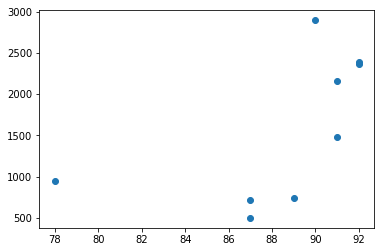

In [320]:
plt.scatter([i[1] for i in vintage_score],[i[2] for i in vintage_score])
plt.legend()
plt.show()

### Vintage Sore ave

In [235]:
list(zip([2007+i for i in range(10)],np.around(wine_table.mean(axis=1), decimals=1)))

[(2007, 90.8),
 (2008, 92.8),
 (2009, 96.0),
 (2010, 96.7),
 (2011, 91.0),
 (2012, 92.2),
 (2013, 88.6),
 (2014, 92.8),
 (2015, 95.2),
 (2016, 96.1)]

### Wine Ranking ave

In [239]:
cat_ranking = np.around(wine_table.mean(axis=0),decimals=1).sort_values()

In [240]:
cat_ranking

Carruades Lafite            89.5
Petit Mouton                90.6
Pavillon Rouge (Margaux)    90.6
Clarence Haut Brion         90.7
Forts Latour                92.3
Lafite Rothschild           95.3
Margaux                     95.7
Mouton Rothschild           96.0
Latour                      96.2
Haut Brion                  96.7
dtype: float64

In [43]:
wine_list[0].tail()

Vintage       2007    2008    2009    2010    2011    2012    2013    2014  \
2019-03-31  6551.0  7100.0  7350.0  7300.0  4900.0  4950.0  4912.0  4730.0   
2019-04-30  6468.0  7100.0  7200.0  7270.0  4850.0  4850.0  4920.0  4800.0   
2019-05-31  6560.0  7200.0  7200.0  7200.0  4762.0  4850.0  4900.0  4800.0   
2019-06-30  6560.0  7200.0  7190.0  7300.0  4809.0  4950.0  4919.0  4824.0   
2019-07-31  6600.0  7200.0  7240.0  7450.0  4910.0  4950.0  4900.0  4850.0   

Vintage       2015    2016    2017  
2019-03-31  5150.0  6024.0  4709.0  
2019-04-30  5190.0  5964.0  4633.0  
2019-05-31  5250.0  6050.0  4780.0  
2019-06-30  5200.0  5760.0  4800.0  
2019-07-31  5200.0  5950.0  4800.0

## Cleaning Data & Checking Basic Info

In [5]:
def file_formatting(sheet):
    #deep copy
    wine = sheet.copy()
    vintage = wine.pop('Vintage')
    release_date =  wine.pop('Release Date')
    date = wine.columns
    wine = wine.T
    wine.columns = vintage
    wine.index = pd.to_datetime(wine.index)
    
    return vintage, release_date , wine
    

In [6]:
wine_list = []
vintage_list = []
for i in range(len(code_name)-1):
    vintage, release_date , wine = file_formatting(code_name[i])
    vintage_list.append(list(zip(vintage,release_date)))
    wine_list.append(wine)

In [44]:
for i,val in enumerate(vintage_list):
    print('======'+str(i)+'======')
    print(val)
    

In [123]:
wine_list[9].describe()[2007]

count     134.000000
mean     1411.246269
std       479.289299
min       536.000000
25%      1170.750000
50%      1453.500000
75%      1837.500000
max      2294.000000
Name: 2007, dtype: float64

In [41]:
def plot_line_graph(wine):
    wine.plot(figsize=(20,10), linewidth=3, fontsize=20,kind='line')
    plt.xlabel(('Year'+str(wine_name[0])), fontsize=20)
    plt.ylabel('Pounds', fontsize=20)

In [ ]:
#plot_line_graph()

In [12]:
def plot_boxchart(wine):
    plt.boxplot(wine)

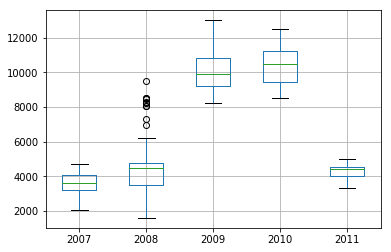

In [40]:
plot_boxchart(wine_list[8])

In [143]:
cross_wine = []
for i in range(10):
    sheet = wine_list[i]
    sheet.mean(axis=1)
    cross_wine.append([sheet.mean(axis=1)])

In [266]:
c_2008=pd.concat(cross_v, axis=1, sort=False).mean(axis=1)


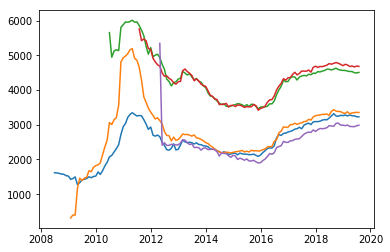

In [280]:
plt.plot(temp)

In [279]:
temp = pd.concat(cross_2, axis=1, sort=False)

In [276]:
#vintage = 2007

cross_2= []

for year in range(2007,2018):
    cross_1 =[]
    for i in range(10):
        sheet = wine_list[i]
        cross_1.append(sheet[year])
    
    cross_2.append(pd.concat(cross_1, axis=1, sort=False).mean(axis=1))



KeyError: 2012

In [161]:
cat_ave = pd.concat(cross_wine, axis=1, sort=False)

In [164]:
cat_ave.set_axis(wine_name[:10], axis=1, inplace=True)

In [245]:
cat_ave.head()

Lafite Rothschild  Carruades Lafite  Mouton Rothschild  \
2008-06-30             2550.0             625.0             2450.0   
2008-07-31             2550.0             625.0             2450.0   
2008-08-31             2500.0             625.0             2400.0   
2008-09-30             2450.0             645.0             2400.0   
2008-10-31             2375.0             650.0             2400.0   

            Petit Mouton  Margaux  Pavillon Rouge (Margaux)  Haut Brion  \
2008-06-30         435.0   2500.0                     375.0      2450.0   
2008-07-31         435.0   2500.0                     372.0      2450.0   
2008-08-31         435.0   2460.0                     375.0      2450.0   
2008-09-30         480.0   2400.0                     365.0      2450.0   
2008-10-31         480.0   2400.0                     380.0      2400.0   

            Clarence Haut Brion  Latour  Forts Latour  
2008-06-30                  NaN  2595.0         565.0  
2008-07-31                  NaN  2568.0         565.0  
2008-08-31                  NaN  2595.0         565.0  
2008-09-30                  NaN  2450.0         565.0  
2008-10-31                  NaN  2450.0         630.0

In [247]:
cat_ave.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 134 entries, 2008-06-30 to 2019-07-31
Freq: M
Data columns (total 10 columns):
Lafite Rothschild           134 non-null float64
Carruades Lafite            134 non-null float64
Mouton Rothschild           134 non-null float64
Petit Mouton                134 non-null float64
Margaux                     134 non-null float64
Pavillon Rouge (Margaux)    134 non-null float64
Haut Brion                  134 non-null float64
Clarence Haut Brion         124 non-null float64
Latour                      134 non-null float64
Forts Latour                134 non-null float64
dtypes: float64(10)
memory usage: 11.5 KB


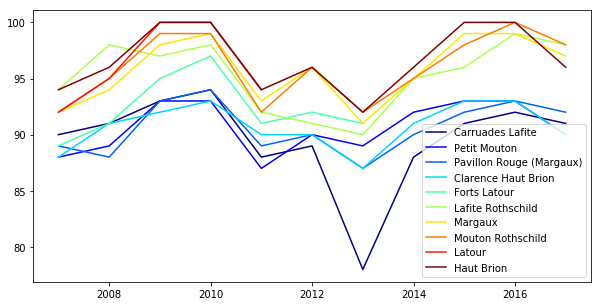

In [241]:
wine_table
colormap = plt.cm.gist_ncar
fig = plt.figure(figsize=(10,5))
fig.gca().set_prop_cycle(plt.cycler('color', plt.cm.jet(np.linspace(0, 1, 10))))
labels = []
for i in (cat_ranking.index):
    plt.plot(wine_table[i])
    name = i 
    labels.append(name)
plt.legend(labels)

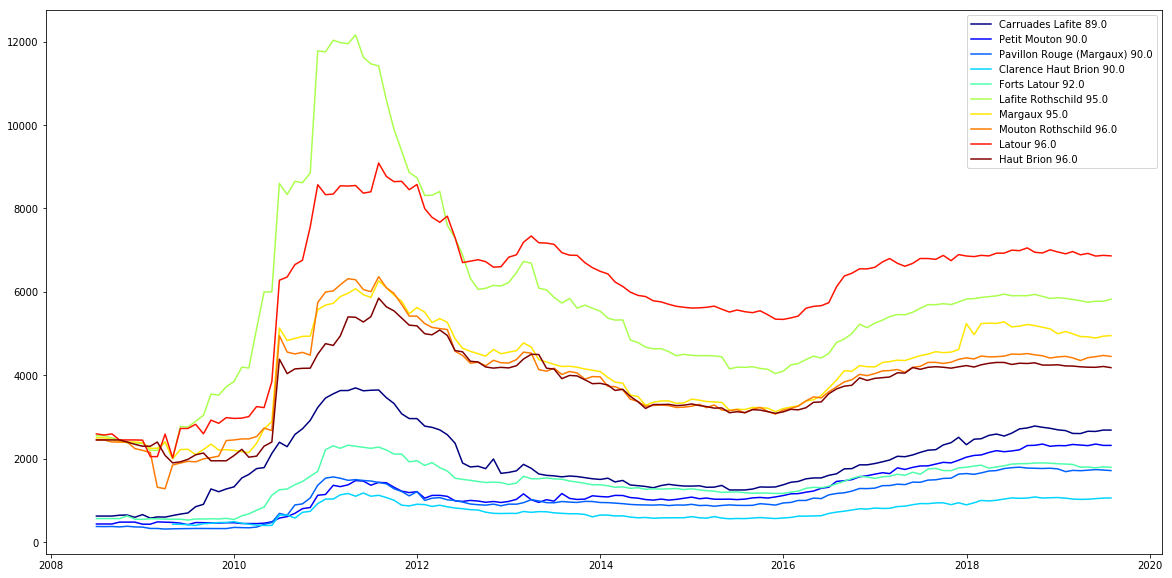

In [246]:
colormap = plt.cm.gist_ncar
fig = plt.figure(figsize=(20,10))
fig.gca().set_prop_cycle(plt.cycler('color', plt.cm.jet(np.linspace(0, 1, 10))))
labels = []
for i in (cat_ranking.index):
    plt.plot(cat_ave[i])
    name = i +' ' + str(np.floor(cat_ranking[i]))
    labels.append(name)
plt.legend(labels)

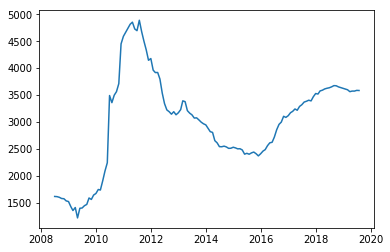

In [254]:
plt.plot(cat_ave.mean(axis=1))

In [302]:
wine_list[0][2008].loc[:'2013-02-28']

2008-06-30        NaN
2008-07-31        NaN
2008-08-31        NaN
2008-09-30        NaN
2008-10-31        NaN
2008-11-30        NaN
2008-12-31        NaN
2009-01-31        NaN
2009-02-28        NaN
2009-03-31        NaN
2009-04-30     2098.0
2009-05-31     3300.0
2009-06-30     3016.0
2009-07-31     3300.0
2009-08-31     3476.0
2009-09-30     4400.0
2009-10-31     4300.0
2009-11-30     4450.0
2009-12-31     4700.0
2010-01-31     4850.0
2010-02-28     4750.0
2010-03-31     6000.0
2010-04-30     7500.0
2010-05-31     7000.0
2010-06-30     9200.0
2010-07-31     8300.0
2010-08-31     8500.0
2010-09-30     8500.0
2010-10-31     8900.0
2010-11-30    13634.0
2010-12-31    14250.0
2011-01-31    14200.0
2011-02-28    14200.0
2011-03-31    13950.0
2011-04-30    14189.0
2011-05-31    12927.0
2011-06-30    12950.0
2011-07-31    12500.0
2011-08-31    11000.0
2011-09-30     9000.0
2011-10-31     9000.0
2011-11-30     8604.0
2011-12-31     8500.0
2012-01-31     8000.0
2012-02-29     7700.0
2012-03-31

SyntaxError: invalid token (<ipython-input-305-169557b0af4c>, line 1)

In [26]:
def get_rank(wine):
    for vintage in wine.columns:
        copy = wine[vintage].copy()
        print(vintage)
        print(copy.nlargest(5))

In [35]:
get_rank(wine_list[4])

2007
2018-08-31    3900.0
2018-09-30    3900.0
2018-10-31    3900.0
2019-01-31    3880.0
2019-03-31    3860.0
Name: 2007, dtype: float64
2008
2011-04-30    5580.0
2011-02-28    5450.0
2011-05-31    5400.0
2011-01-31    5226.0
2011-03-31    5200.0
Name: 2008, dtype: float64
2009
2010-06-30    9000.0
2011-04-30    8950.0
2011-03-31    8900.0
2010-12-31    8750.0
2010-11-30    8709.0
Name: 2009, dtype: float64
2010
2011-07-31    7962.0
2011-08-31    7800.0
2011-09-30    7800.0
2011-10-31    7800.0
2011-11-30    7200.0
Name: 2010, dtype: float64
2011
2012-10-31    3800.0
2012-11-30    3800.0
2012-05-31    3798.0
2013-02-28    3750.0
2013-03-31    3750.0
Name: 2011, dtype: float64
2012
2018-08-31    3700.0
2018-10-31    3700.0
2018-11-30    3700.0
2018-05-31    3694.0
2019-02-28    3660.0
Name: 2012, dtype: float64
2013
2018-10-31    3700.0
2018-11-30    3700.0
2018-09-30    3696.0
2018-08-31    3650.0
2019-02-28    3600.0
Name: 2013, dtype: float64
2014
2018-07-31    3700.0
2018-06-30    3

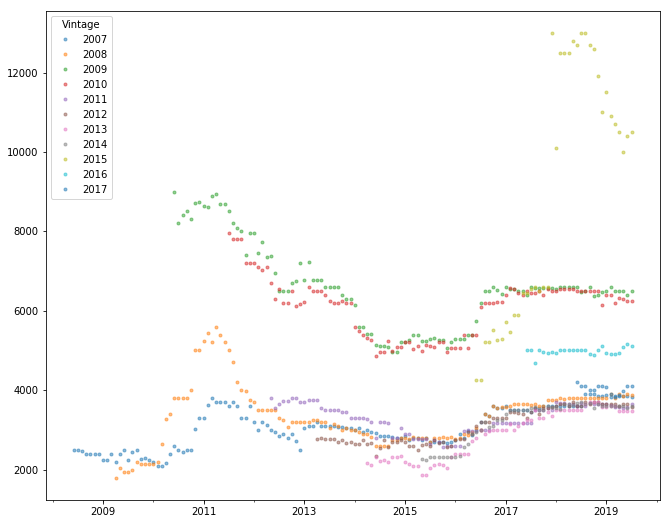

In [36]:
wine_list[4].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=False)

(array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10]),
 array([0.86471928, 0.87803073, 0.89126623, 0.90433931, 0.91671318,
        0.92892508, 0.94049477, 0.95182489, 0.96212849, 0.97202855,
        0.98042851, 0.97710008, 0.97299585, 0.96791106, 0.9622893 ,
        0.95581758, 0.94816464, 0.94006397, 0.93136096, 0.92192247,
        0.91186981]),
 None)

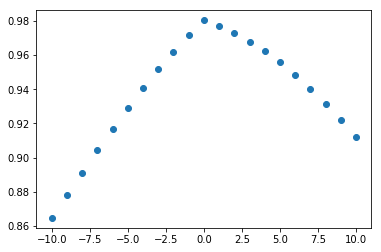

In [69]:
def plot_cross_corr(wine):
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.xcorr(wine[2007].loc['2009-04-30':], wine[2008].loc['2009-04-30':], usevlines=False, maxlags=10, normed=True)

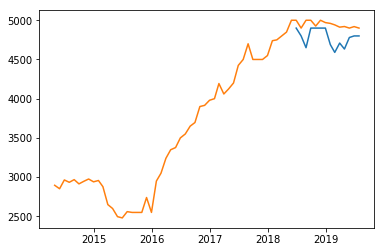

In [32]:
def plot_check_graph():
    plt.plot(wine[2017])
    plt.plot(wine[2013])
    plt.show()

In [49]:
def plot_corr(wine):
    corr = wine.corr()
    ax = sns.heatmap(corr,cmap='YlGnBu',annot=True)
    ax.invert_yaxis()

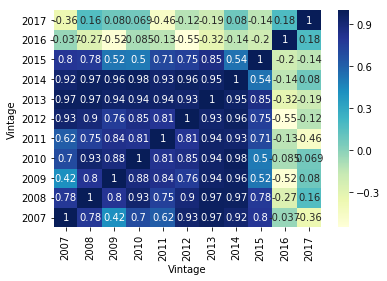

In [55]:
plot_corr(wine_list[6])

In [257]:
def plot_diff(wine):
#first-order differences; removing the trend may reveal correlation in seasonality.
    wine.diff().plot(figsize=(8,5), linewidth=2, fontsize=20)

In [258]:
plot_diff(cat_ave.mean(axis=1))

In [9]:
wine.diff().corr()

Vintage      2007      2008      2009      2010      2011      2012      2013  \
Vintage                                                                         
2007     1.000000  0.528673  0.543886  0.311411  0.457173  0.141935  0.216927   
2008     0.528673  1.000000  0.654470  0.274083  0.222684  0.084765 -0.033604   
2009     0.543886  0.654470  1.000000  0.333196  0.380731  0.279509  0.087001   
2010     0.311411  0.274083  0.333196  1.000000  0.310573  0.070650  0.136412   
2011     0.457173  0.222684  0.380731  0.310573  1.000000  0.345428  0.183628   
2012     0.141935  0.084765  0.279509  0.070650  0.345428  1.000000  0.199010   
2013     0.216927 -0.033604  0.087001  0.136412  0.183628  0.199010  1.000000   
2014     0.542054  0.323909  0.130134  0.118765  0.539248  0.177865  0.035307   
2015     0.020093  0.157042 -0.194647  0.080626  0.176069 -0.041861  0.057154   
2016     0.310169  0.346402 -0.301180 -0.164026 -0.301490 -0.279601 -0.135470   
2017     0.332626 -0.303849  0.331831 -0.124451 -0.150362  0.590192 -0.104953   

Vintage      2014      2015      2016      2017  
Vintage                                          
2007     0.542054  0.020093  0.310169  0.332626  
2008     0.323909  0.157042  0.346402 -0.303849  
2009     0.130134 -0.194647 -0.301180  0.331831  
2010     0.118765  0.080626 -0.164026 -0.124451  
2011     0.539248  0.176069 -0.301490 -0.150362  
2012     0.177865 -0.041861 -0.279601  0.590192  
2013     0.035307  0.057154 -0.135470 -0.104953  
2014     1.000000  0.213337  0.107748 -0.408694  
2015     0.213337  1.000000  0.154379 -0.146229  
2016     0.107748  0.154379  1.000000 -0.115850  
2017    -0.408694 -0.146229 -0.115850  1.000000

Autocorrelation
Auto-correlation is the comparison of a time series with itself at a different time. It aims, for example, to detect repeating patterns or seasonality. For example: “Is there weekly seasonality on a server website?”
Cross-correlation is the comparison of two different time series to detect if there is a correlation between metrics with the same maximum and minimum values.For example: “Are two audio signals in phase?”
shitf by time 



In [ ]:
#So, this means that if the original time series repeats itself every two days, you would expect to see a spike in the autocorrelation function at 2 days.
#how correlated the time series is with itself at that lag

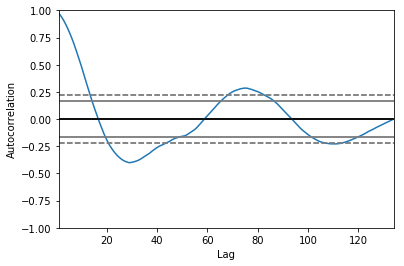

In [13]:
fig1 = pd.plotting.autocorrelation_plot(wine[2007])

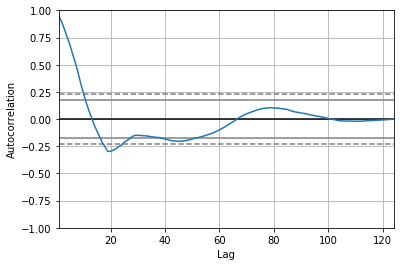

In [19]:
fig2 = pd.plotting.autocorrelation_plot(wine[2008].loc['2009-04-30':])

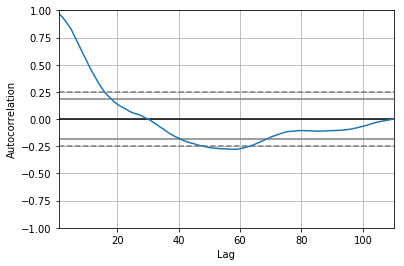

In [27]:
fig3 = pd.plotting.autocorrelation_plot(wine[2009].loc['2010-06-30':])

In [28]:
pd.plotting.autocorrelation_plot(wine[2010].loc['2011-07-31':])

In [18]:
release_date

0    2008-06-30
1    2009-04-30
2    2010-06-30
3    2011-07-31
4    2012-04-30
5    2013-04-30
6    2014-04-30
7    2015-05-31
8    2016-06-30
9    2017-06-30
10   2018-06-30
Name: Release Date, dtype: datetime64[ns]

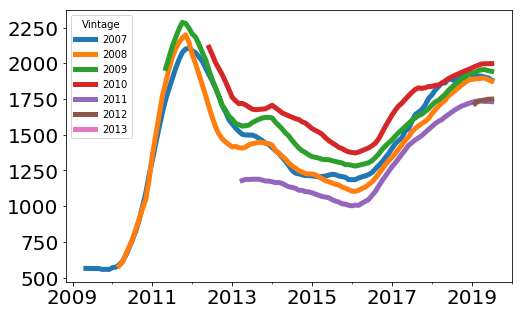

In [244]:
wine.rolling(12).mean().plot(figsize=(8,5), linewidth=5, fontsize=20)

resource = https://www.datacamp.com/community/tutorials/time-series-analysis-tutorial

In [ ]:
# assumption here: doesn't matter of vintage 
#we expect new launched wine have same path 
# by checking on data, wrong assumption 


In [54]:
#normalize cross correlation
a = wine[2008].loc['2009-04-30':]
b = wine[2007].loc['2009-04-30':]
a = (a - np.mean(a)) / (np.std(a) * len(a))
b = (b - np.mean(b)) / (np.std(b))
c = np.correlate(a, b, 'full')

In [55]:
len(c)

247

In [95]:

temp = pd.DataFrame({'2017':wine[2017].loc['2018-06-30':],'2018':wine[2016].loc['2018-06-30':]})

In [96]:
temp.corr()

2017      2018
2017  1.000000 -0.103415
2018 -0.103415  1.000000

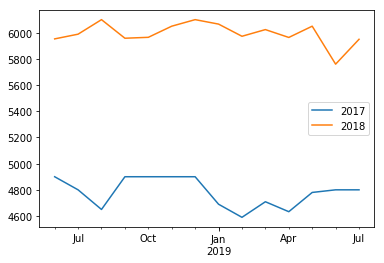

In [97]:
temp.plot()

In [103]:
temp.rolling(6).mean()['2018-11-30':].corr()


2017      2018
2017  1.000000  0.487675
2018  0.487675  1.000000

In [104]:
temp.rolling(6).mean()['2018-11-30':].plot()

In [119]:

fig, ax = plt.subplots(figsize=(20,10))
plt.xticks(rotation=90)

#ax.plot(wine[2007], marker='o', linestyle='-')
ax.plot(wine, linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)')
ax.set_title('Jan-Feb 2017 Electricity Consumption')
# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.MonthLocator())
# Format x-tick labels as 3-letter month name and day number

ax.xaxis.set_major_formatter(mdates.DateFormatter('%y'));